In [10]:
%matplotlib inline

import geopandas as gpd

import sys
sys.path.insert(0, "../")
from weavingspace import TileUnit
from weavingspace import Tiling

In [11]:
ak = gpd.read_file("data/imd-auckland-2018.gpkg")

In [16]:
tile_unit = TileUnit(tiling_type = "hex-colouring", n = 7,
                     spacing = 300, crs = ak.crs).transform_rotate(45)

In [17]:
tiling = Tiling(tile_unit, ak, as_icons = True)

In [18]:
tm = tiling.get_tiled_map()
tm.variables = dict(zip(list("abcdefg"), 
                         [x for x in ak if "Rank" in x]))
tm.colourmaps = dict(zip(tm.variables.values(), 
                          ("BrBG", "RdGy", "RdYlBu", "Spectral", 
                           "PiYG", "PRGn", "PuOr", "viridis")))

<Axes: >

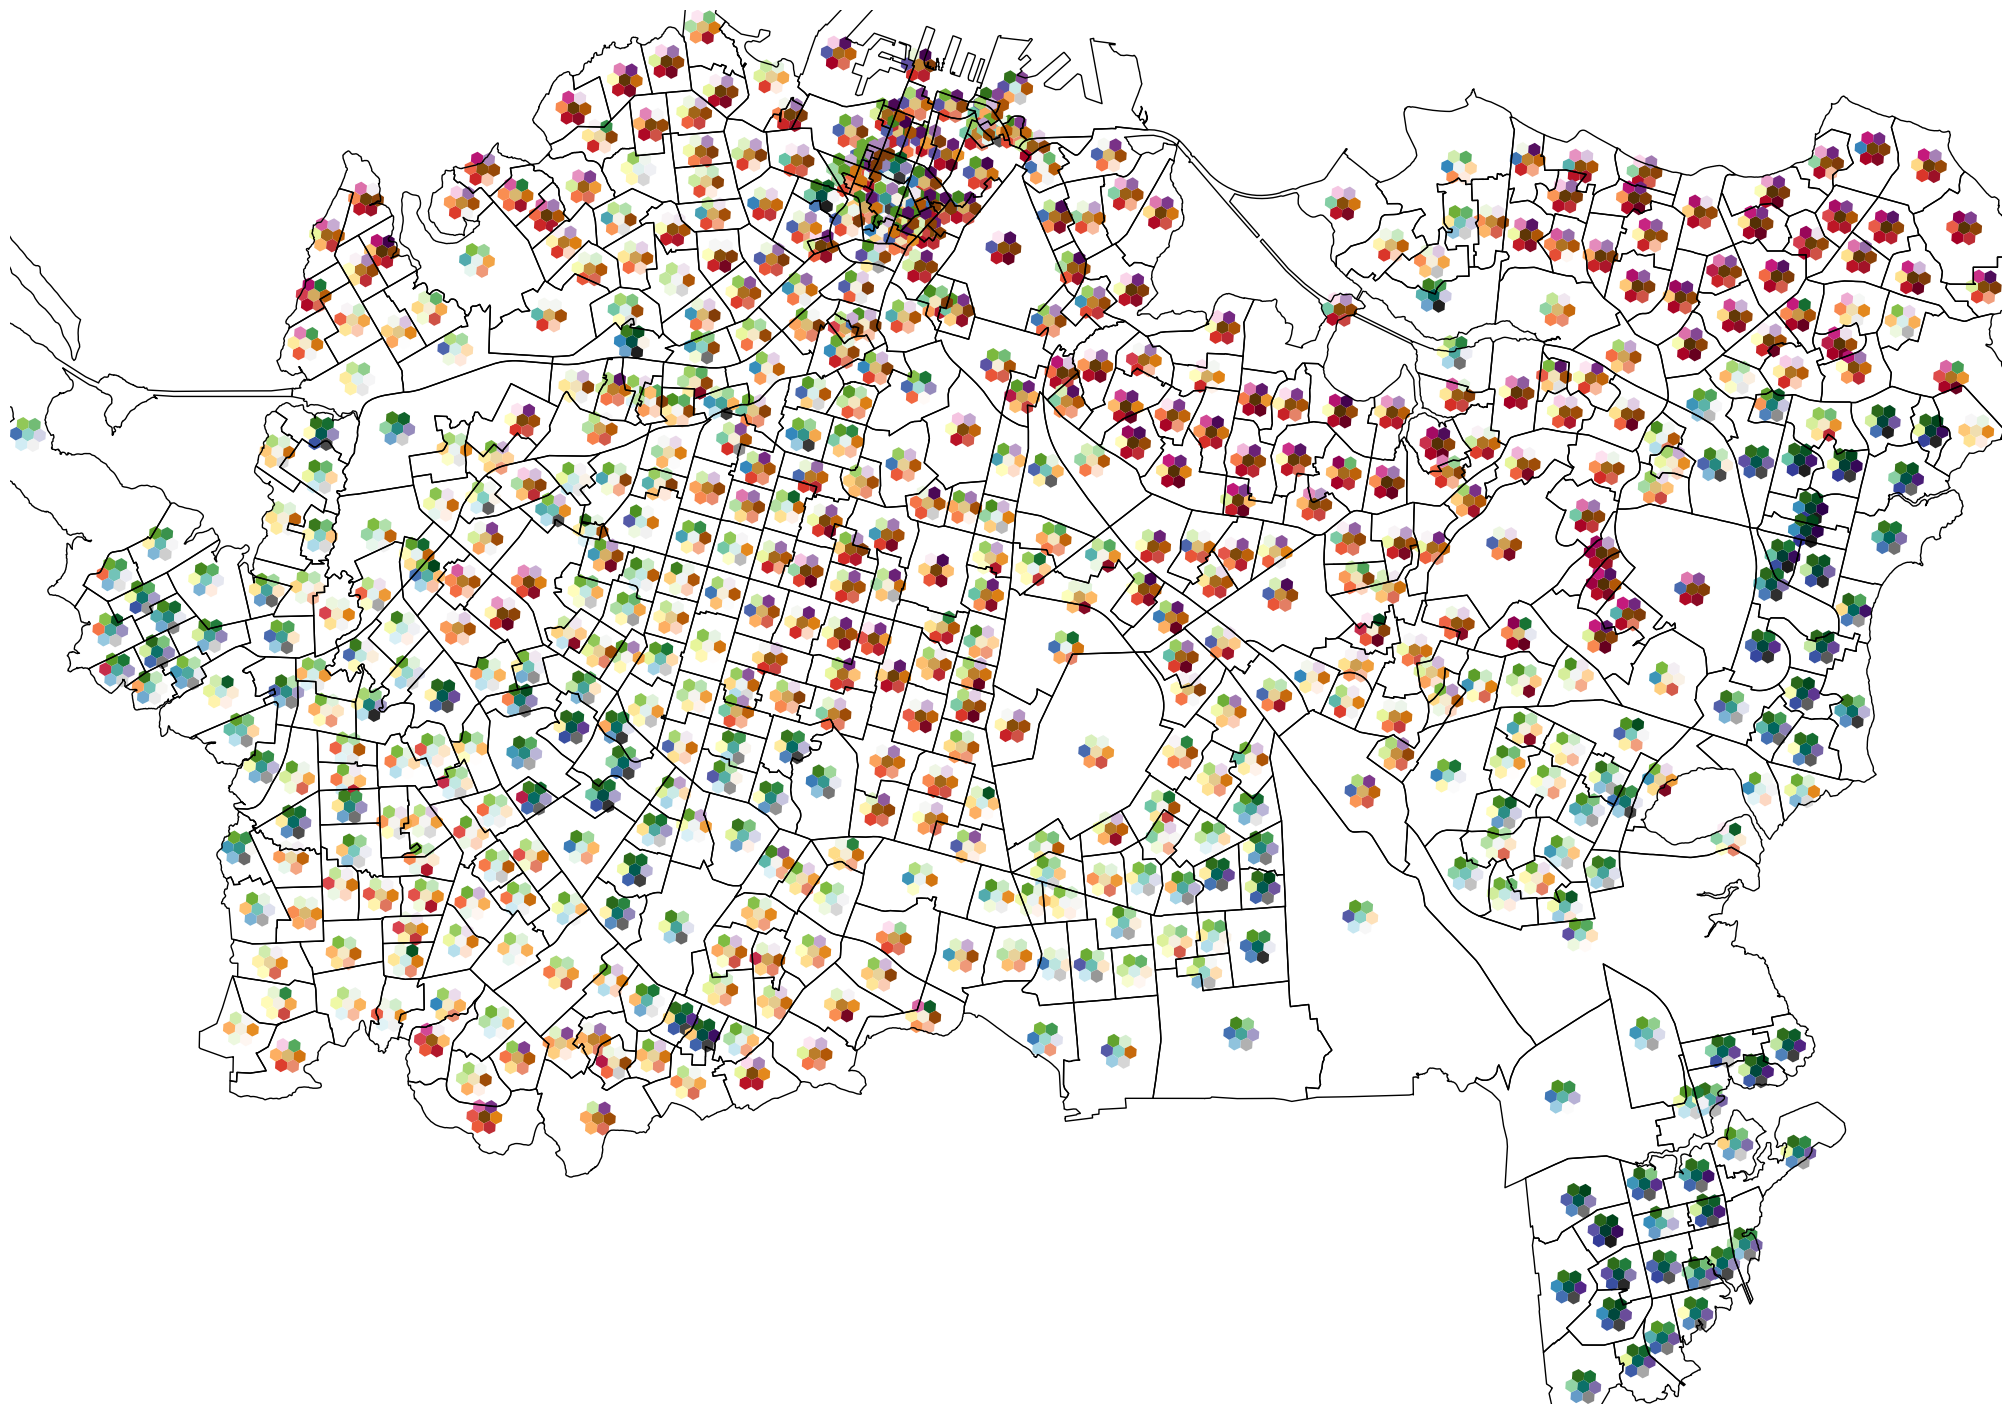

In [19]:
fig = tm.render(legend=False)
ak.plot(ax = fig.get_axes()[0], fc = "#00000000", ec = "k")